Assignment 1  

Problem 1 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

step 1 download datase

In [3]:
df = pd.read_csv('house_prices.csv')
df['Neighborhood']= df['Neighborhood'].astype('category')

use Dataframe.info and Dataframe.describe functions to check the dataset.

In [4]:
print(df.info())
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SqFt          128 non-null    int64   
 1   Bedrooms      128 non-null    int64   
 2   Bathrooms     128 non-null    int64   
 3   Neighborhood  128 non-null    category
 4   Price         128 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 4.4 KB
None

              SqFt    Bedrooms   Bathrooms          Price
count   128.000000  128.000000  128.000000     128.000000
mean   2000.937500    3.023438    2.445312  130427.343750
std     211.572431    0.725951    0.514492   26868.770371
min    1450.000000    2.000000    2.000000   69100.000000
25%    1880.000000    3.000000    2.000000  111325.000000
50%    2000.000000    3.000000    2.000000  125950.000000
75%    2140.000000    3.000000    3.000000  148250.000000
max    2590.000000    5.000000    4.000000  211200.000000


step 2 Use seaborn library to visualize dataset.

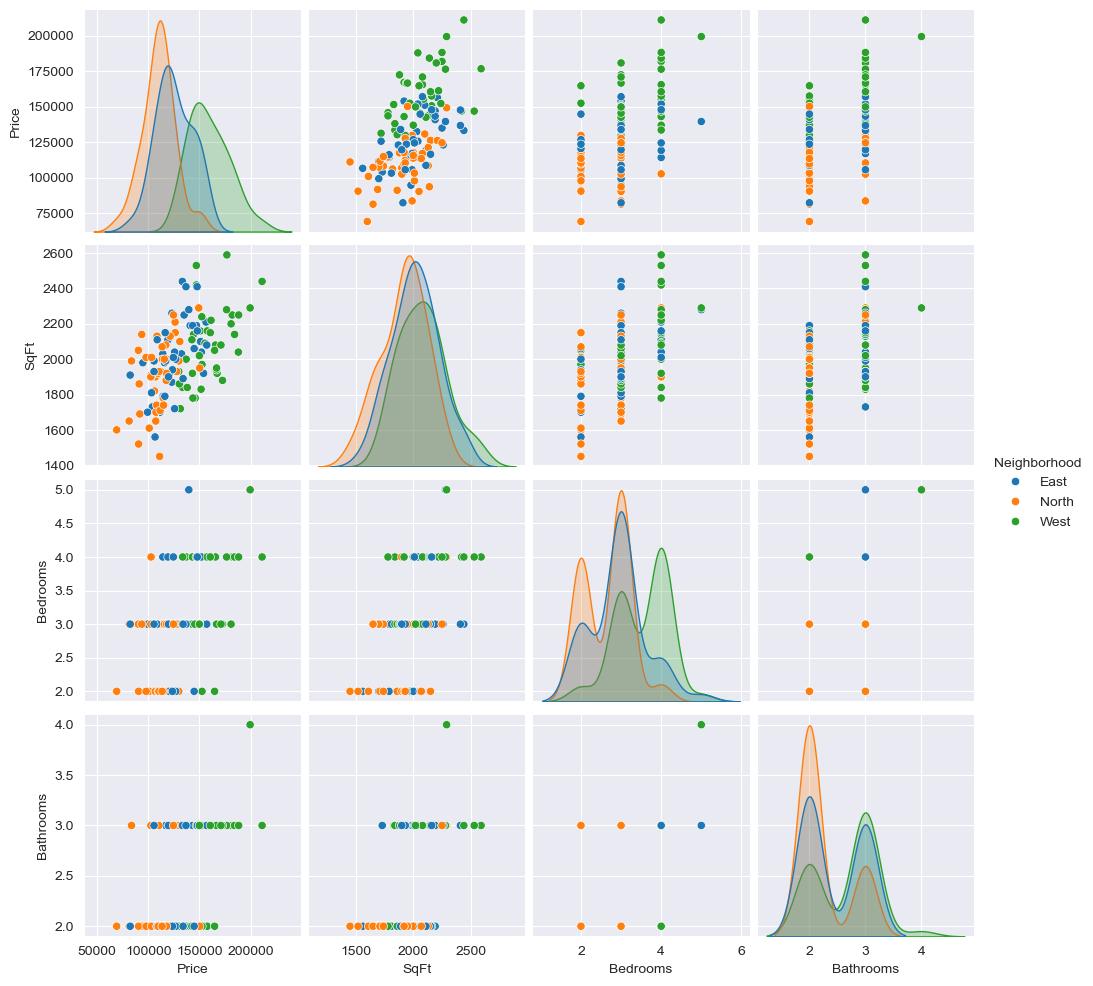

In [5]:
sns.pairplot(df, vars=['Price','SqFt', 'Bedrooms','Bathrooms'], hue='Neighborhood')
plt.show()

Use seaborn.heatmap function to plot the pairwise correlation on data.

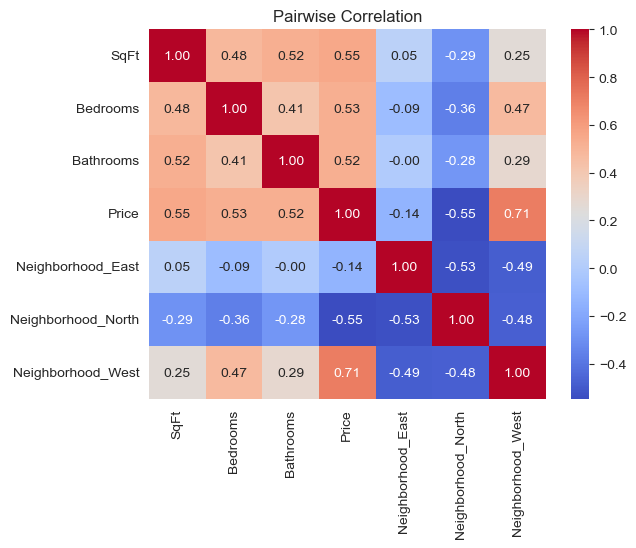

In [6]:
df_dummies = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood')
df_with_dummies = pd.concat([df.drop(columns=['Neighborhood']), df_dummies], axis=1)
sns.heatmap(df_with_dummies.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pairwise Correlation")
plt.show()

here we can see: The correlation between price and sqft is larger, and the correlation with bathroom is smaller

Step 3: Use sklearn library to process the category variable

use ColumnTransformer function and OneHotEncoder function to convert the category column into a one-hot numeric matrix in the dataset

In [7]:
column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), ['Neighborhood'])],remainder='passthrough')
data_encoded = column_transformer.fit_transform(df)
df_encoded = pd.DataFrame(data_encoded)
print(df_encoded)

       0    1    2       3    4    5         6
0    1.0  0.0  0.0  1790.0  2.0  2.0  114300.0
1    1.0  0.0  0.0  2030.0  4.0  2.0  114200.0
2    1.0  0.0  0.0  1740.0  3.0  2.0  114800.0
3    1.0  0.0  0.0  1980.0  3.0  2.0   94700.0
4    1.0  0.0  0.0  2130.0  3.0  3.0  119800.0
..   ...  ...  ...     ...  ...  ...       ...
123  1.0  0.0  0.0  1900.0  3.0  3.0  119700.0
124  1.0  0.0  0.0  2160.0  4.0  3.0  147900.0
125  0.0  1.0  0.0  2070.0  2.0  2.0  113500.0
126  0.0  0.0  1.0  2020.0  3.0  3.0  149900.0
127  0.0  1.0  0.0  2250.0  3.0  3.0  124600.0

[128 rows x 7 columns]


We use train test split to randomly split the data into two parts, one contains 80% of the samples as train data and the 
other contains 20% of the samples as test data

In [8]:
X = df_encoded.drop(columns=[6])  # 特征变量
    # print(X)
y = df['Price']  # 目标变量
    #
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #
print("Train set size:", len(X_train))
    # print(X_train)
    # print(y_train)
print("Test set size:", len(X_test))

Train set size: 102
Test set size: 26


 Step 4: Use sklearn library to train and evaluate a linear regression model

We use LinearRegression functionto train a linear regression model with
“Price” as target and “SqFt”, “Bedrooms”, “Bathrooms”, “Neighborhood” as predictors.

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

use mean squared error function to evaluate the performance of fitted model.

In [10]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 14167.555021819697
Testing RMSE: 15875.701191909646


In [11]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 14167.555021819697
Testing RMSE: 15875.701191909646


problem 2

import

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Step 1 Use numpy library to conduct the training of linear regression model. We use matrix
operations in numpy to write the codes of learning the parameters with gradient descent
methods. (Notice: Do not use the linear regression packages of Sklearn)

In [13]:
def leanerregression(Xtrain, ytrain,Xtest,ytest, a, num):
    W = np.zeros((10, 1))
    b = 0
    # print(W)
    train_loss = []
    test_loss = []
    # print(4)
    for i in range(num):
        ytrpred = np.dot(Xtrain,W)+b
        trainloss = np.mean((ytrpred - ytrain) ** 2)
        train_loss.append(trainloss)
        # print(W)
        W = W - a*np.dot(Xtrain.T,(np.dot(Xtrain,W)-ytrain))
        b = b - a*np.mean((np.dot(Xtrain,W) + b - ytrain))
        # print()
        # print(5,"  ",i)
        # print(W)  #10*1
        # print("W shape is ",W.shape)
        # print("b shape is ", b.shape)
        ytepred = np.dot(Xtest, W) + b
        testloss = np.mean((ytest - ytepred) ** 2)
        test_loss.append(testloss)

    y_pred_train = np.dot(Xtrain, W) + b
    train_rmse = np.sqrt(np.mean((y_pred_train - ytrain) ** 2))
    y_pred_test = np.dot(Xtest, W) + b
    test_rmse = np.sqrt(np.mean((y_pred_test - ytest) ** 2))



    return W , b , train_loss, test_loss,train_rmse,test_rmse

• Step 2: Randomly split the data into two parts, one contains 80% of the samples and the
other contains 20% of the samples.

In [14]:
data = np.genfromtxt('diabetes.csv', delimiter=',', skip_header=1)
X = data[:, :10] 
y = data[:, -1].reshape(-1, 1)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Use the first part as training data and train a linear
regression model and make prediction on the second part. Report the training error and
testing error in terms of RMSE. Plot the loss curves in the training process.

this part has done in the step one linear regression part

Step 3: Repeat the splitting, training, and testing for 10 times with different parameters
such as step size, iterations, etc. 
Use a loop and print the RMSE in each trial.

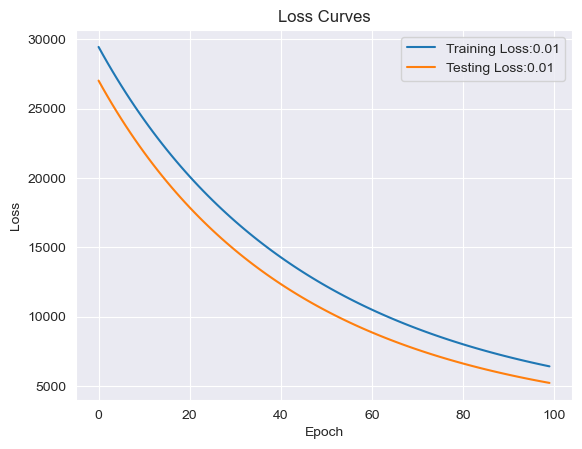

Training RMSE for 0 th   79.66145307803716
Testing RMSE for 0 th   72.24923176745811


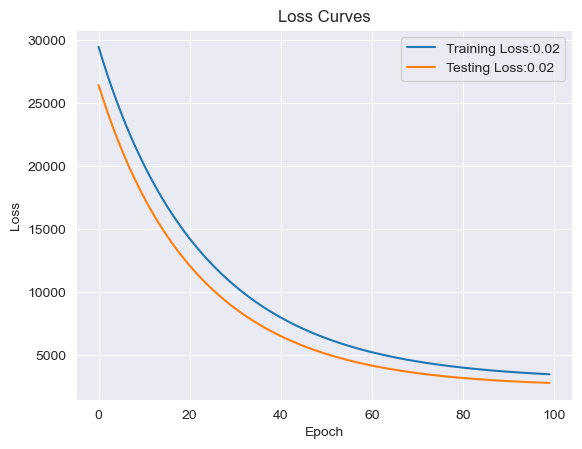

Training RMSE for 1 th   58.65656915153931
Testing RMSE for 1 th   52.65220075385907


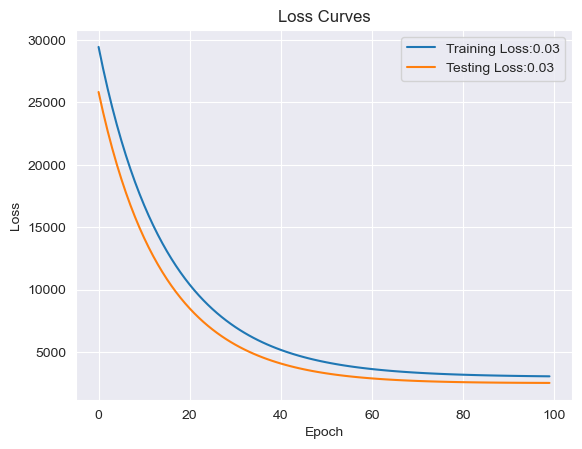

Training RMSE for 2 th   55.33368280730658
Testing RMSE for 2 th   50.363057209545


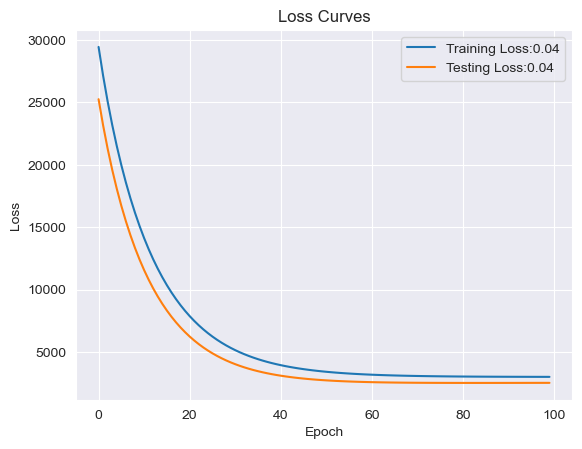

Training RMSE for 3 th   54.91563196807701
Testing RMSE for 3 th   50.371198638614565


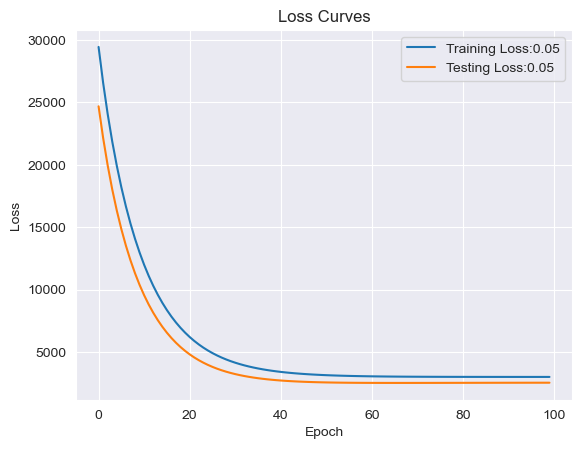

Training RMSE for 4 th   54.87838842669217
Testing RMSE for 4 th   50.48178851590385


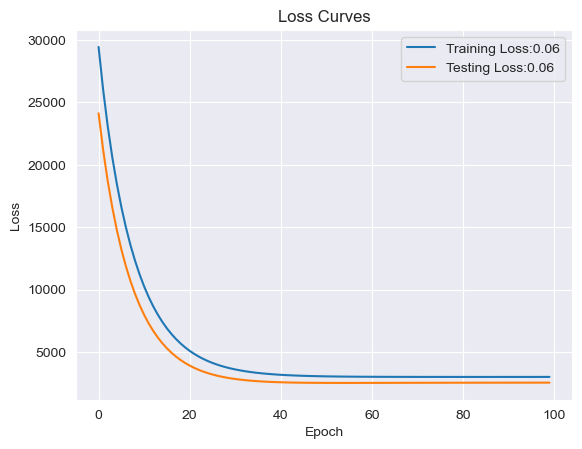

Training RMSE for 5 th   54.88368668306885
Testing RMSE for 5 th   50.530491955072435


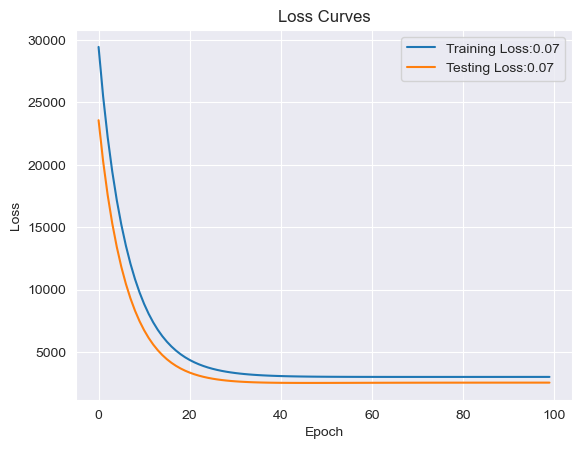

Training RMSE for 6 th   54.89181335832849
Testing RMSE for 6 th   50.54567674882184


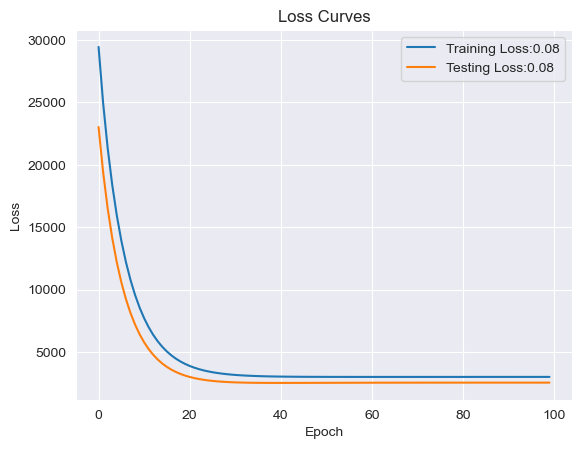

Training RMSE for 7 th   54.89973892708031
Testing RMSE for 7 th   50.54933785763879


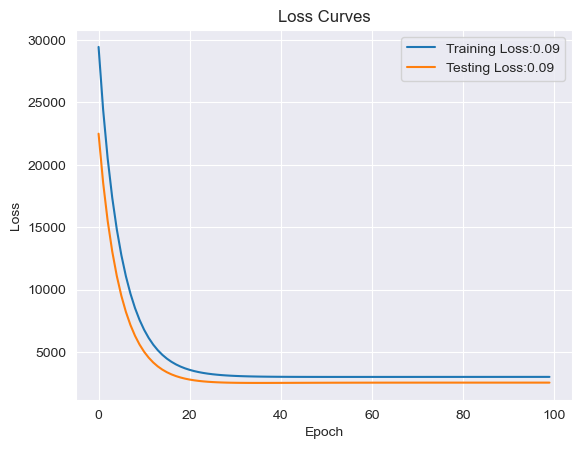

Training RMSE for 8 th   54.90789661008369
Testing RMSE for 8 th   50.55073036681822


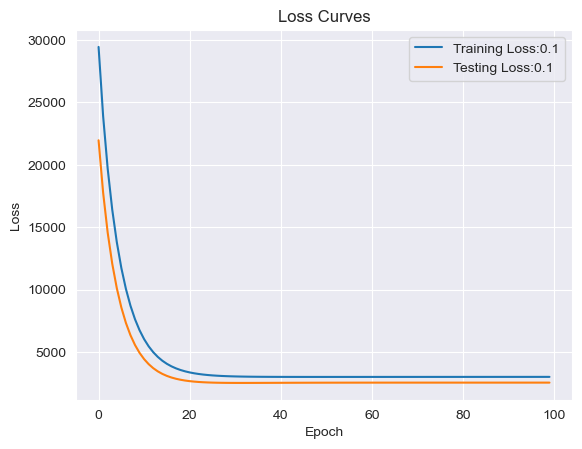

Training RMSE for 9 th   54.91657469324769
Testing RMSE for 9 th   50.553039143147416


In [17]:
a = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
for i in range(10):
    # print(3,"  ", i)
    W , b, train_losses, test_losses,trainrmse,testrmse = leanerregression(X_train, y_train,X_test,y_test, a[i], 100)
    TrainingLoss=f'Training Loss:{a[i]}'
    TestingLoss = f'Testing Loss:{a[i]}'
    plt.plot(train_losses, label=TrainingLoss)
    plt.plot(test_losses, label=TestingLoss)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curves')
    plt.show()
    print("Training RMSE for", i, "th  ",trainrmse)
    print("Testing RMSE for", i,"th  ", testrmse)